<h2 style="color:green; font-size: 40px;" align="center"> EXPLORATORY DATA ANALYSIS <h2>
<h2 style="color:grey" align="center">Ratail Industry<h2>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [25]:
df = pd.read_csv('Retail_Location_Analysis.csv')
print('rows:',df.shape[0], 'columns:',df.shape[1])
df.isnull().sum()

rows: 300 columns: 5


store_id           0
week               0
conversion_rate    0
adoption           0
province           0
dtype: int64

In [26]:
df.head(5)

,store_id,week,conversion_rate,adoption,province
0,45,1,0.250,0.147,ON
1,45,2,0.213,0.031,ON
2,45,3,0.319,0.835,ON
3,45,4,0.278,0.383,ON
4,45,5,0.344,0.211,ON


In [27]:
number_stores = len(df['store_id'].unique())
distinct_provinces = df['province'].unique()
print('distinct_stores',number_stores)
print('distinct_provinces', distinct_provinces)

distinct_stores 60
distinct_provinces ['ON' 'BC' 'AB']


In [28]:
df[['conversion_rate', 'adoption']].describe()

,conversion_rate,adoption
count,300.000000,300.00000
mean,0.218540,0.27596
std,0.085436,0.20992
min,0.011000,0.00300
25%,0.155000,0.11375
50%,0.215000,0.22750
75%,0.282750,0.38450
max,0.419000,0.96600


In [29]:
province_conv_rate_mean= df.groupby("province")["conversion_rate"].mean().reset_index()
province_adoption_mean= df.groupby("province")["adoption"].mean().reset_index()
print(province_conv_rate_mean)
print(province_adoption_mean)


  province  conversion_rate
0       AB          0.24497
1       BC          0.19652
2       ON          0.21413
  province  adoption
0       AB   0.31796
1       BC   0.24867
2       ON   0.26125


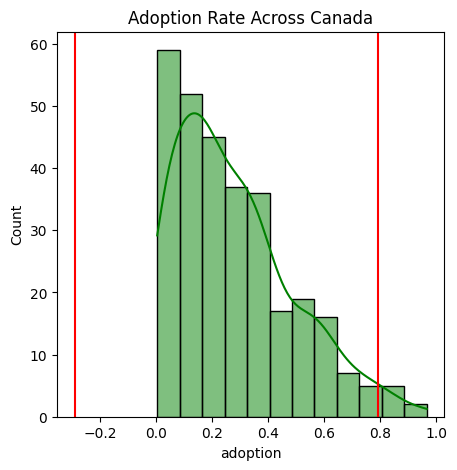

In [30]:
plt.figure(figsize=(5, 5))
sns.histplot(df['adoption'], kde=True, color='green', label='Data')
plt.title('Adoption Rate Across Canada')
Q1_adoption = df['adoption'].quantile(0.25)
Q3_adoption = df['adoption'].quantile(0.75)
IQR_adoption = Q3_adoption - Q1_adoption
lower_bound_adoption = Q1_adoption - 1.5 * IQR_adoption
upper_bound_adoption = Q3_adoption + 1.5 * IQR_adoption
plt.axvline(lower_bound_adoption, color="red")
plt.axvline(upper_bound_adoption, color="red")
plt.show()

In [31]:
Q1, Q3 = df['conversion_rate'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(-0.036624999999999935, 0.4743749999999999)

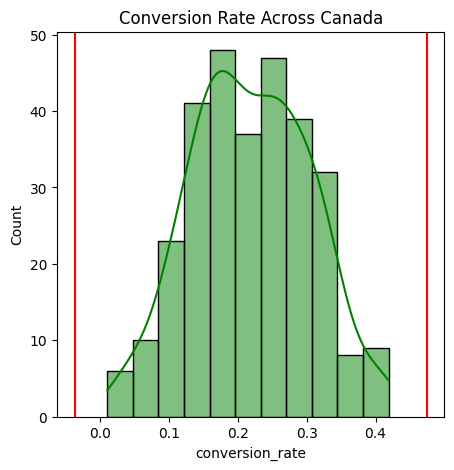

In [32]:
plt.figure(figsize=(5, 5))
sns.histplot(df['conversion_rate'], kde=True, color='green', label='Data')
plt.title('Conversion Rate Across Canada')
plt.axvline(lower, color="red")
plt.axvline(upper, color="red")
plt.show()

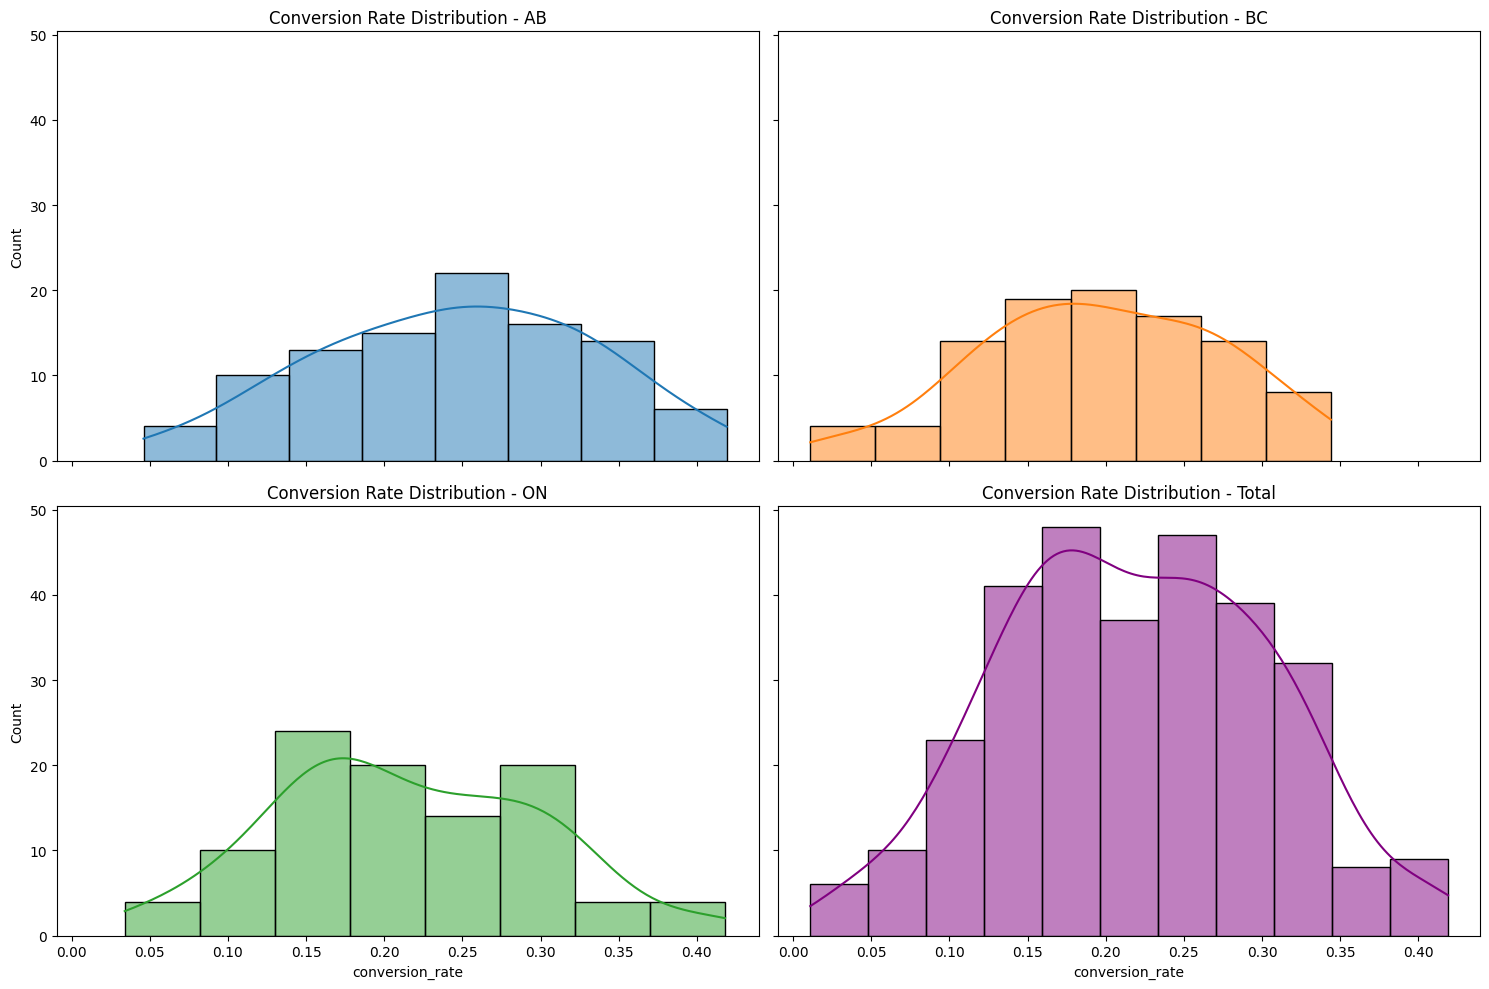

In [33]:
conversion_province_distribution = df.groupby('province')['conversion_rate']
num_provinces = len(conversion_province_distribution.groups)
num_cols = 2
num_rows = (num_provinces + 1 + num_cols - 1) // num_cols  # +1 for the total distribution
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()
for i, (province, group) in enumerate(conversion_province_distribution):
    sns.histplot(group, kde=True, ax=axes[i], color=sns.color_palette("tab10")[i])
    axes[i].set_title(f"Conversion Rate Distribution - {province}")
sns.histplot(df['conversion_rate'], kde=True, ax=axes[num_provinces], color='purple')
axes[num_provinces].set_title("Conversion Rate Distribution - Total")
for j in range(num_provinces + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


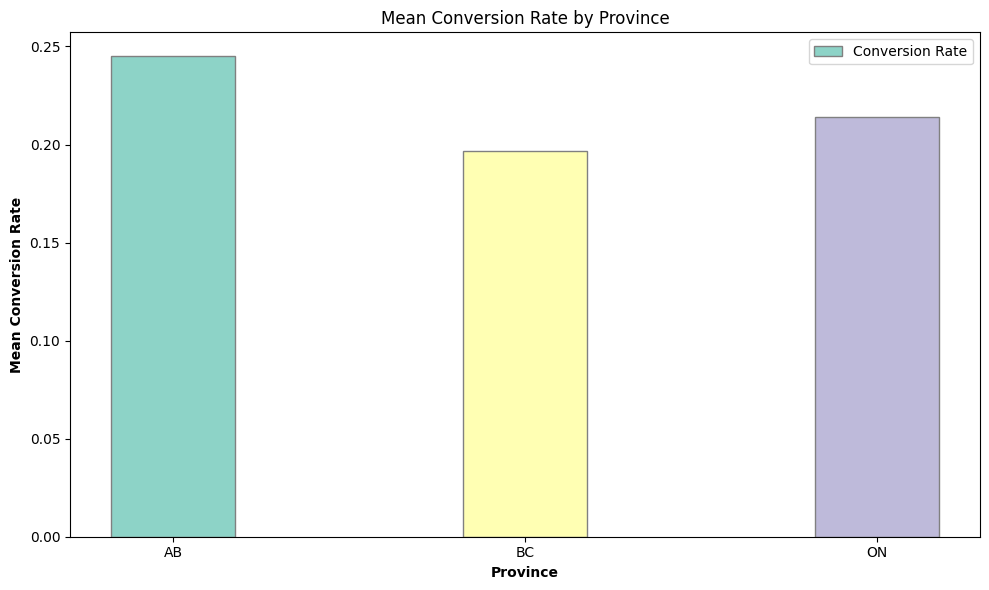

In [34]:
province_conv_rate_mean = df.groupby("province")["conversion_rate"].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
r1 = np.arange(len(province_conv_rate_mean))
colors = sns.color_palette("Set3", len(province_conv_rate_mean))
ax.bar(r1, province_conv_rate_mean['conversion_rate'], color=colors, width=bar_width, edgecolor='grey', label='Conversion Rate')
ax.set_xlabel('Province', fontweight='bold')
ax.set_ylabel('Mean Conversion Rate', fontweight='bold')
ax.set_title('Mean Conversion Rate by Province')
ax.set_xticks(r1)
ax.set_xticklabels(province_conv_rate_mean['province'])
ax.legend()
plt.tight_layout()
plt.show()



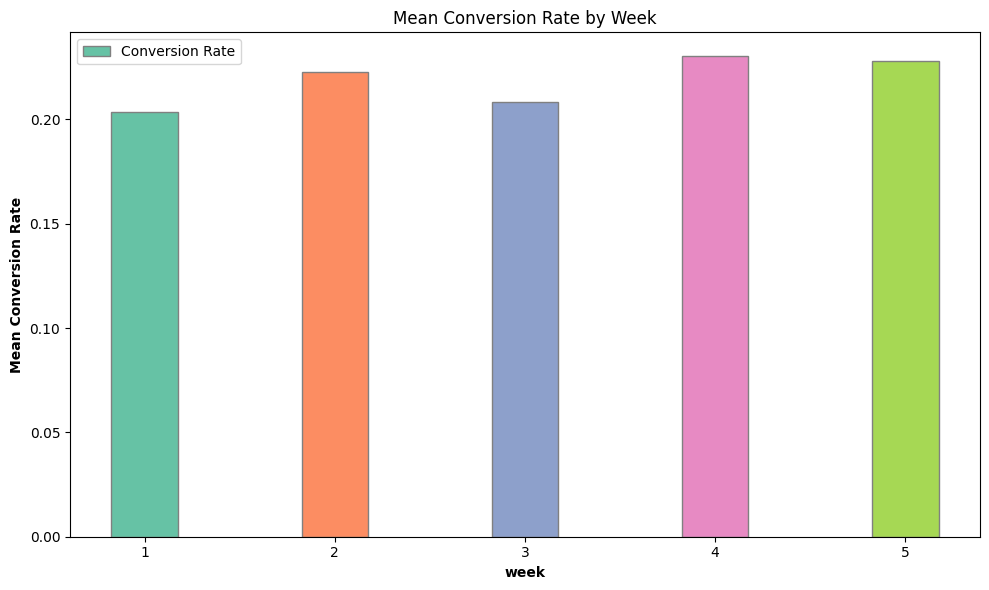

In [35]:
province_conv_rate_mean = df.groupby("week")["conversion_rate"].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
r1 = np.arange(len(province_conv_rate_mean))
colors = sns.color_palette("Set2", len(province_conv_rate_mean))
ax.bar(r1, province_conv_rate_mean['conversion_rate'], color=colors, width=bar_width, edgecolor='grey', label='Conversion Rate')
ax.set_xlabel('week', fontweight='bold')
ax.set_ylabel('Mean Conversion Rate', fontweight='bold')
ax.set_title('Mean Conversion Rate by Week')
ax.set_xticks(r1)
ax.set_xticklabels(province_conv_rate_mean['week'])
ax.legend()
plt.tight_layout()
plt.show()

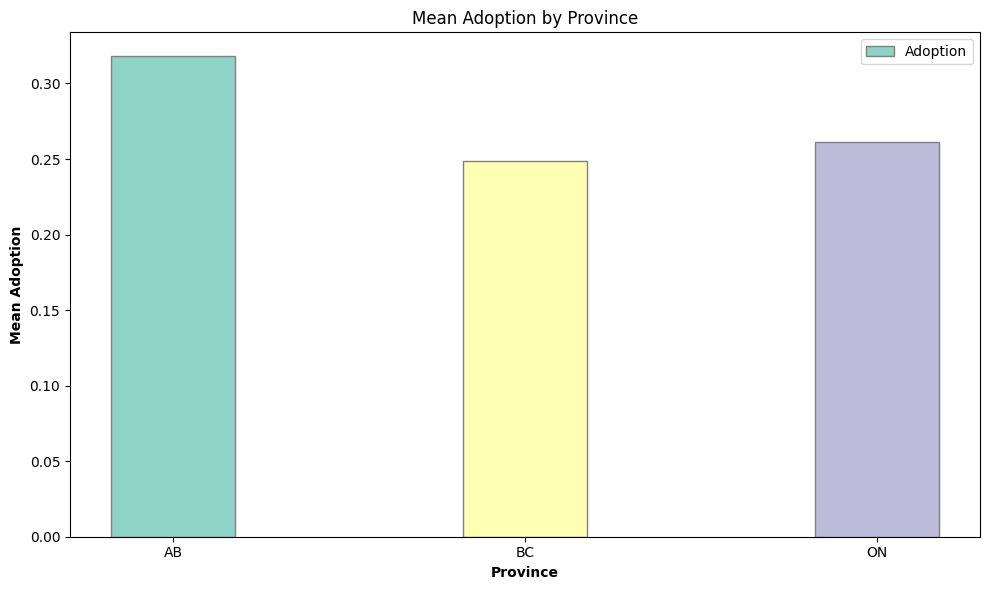

In [36]:
province_adoption_mean = df.groupby("province")["adoption"].mean().reset_index()
colors = sns.color_palette("Set3", len(province_adoption_mean))
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
r1 = np.arange(len(province_adoption_mean))
ax.bar(r1, province_adoption_mean['adoption'], color=colors, width=bar_width, edgecolor='grey', label='Adoption')
ax.set_xlabel('Province', fontweight='bold')
ax.set_ylabel('Mean Adoption', fontweight='bold')
ax.set_title('Mean Adoption by Province')
ax.set_xticks(r1)
ax.set_xticklabels(province_adoption_mean['province'])
ax.legend()
plt.tight_layout()
plt.show()


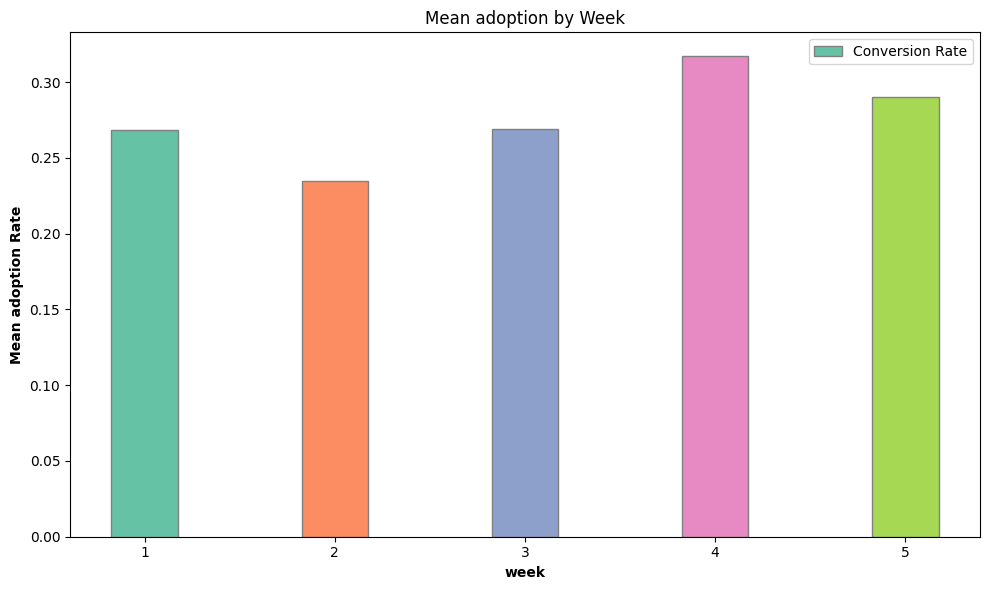

In [37]:
province_conv_rate_mean = df.groupby("week")["adoption"].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
r1 = np.arange(len(province_conv_rate_mean))
colors = sns.color_palette("Set2", len(province_conv_rate_mean))
ax.bar(r1, province_conv_rate_mean['adoption'], color=colors, width=bar_width, edgecolor='grey', label='Conversion Rate')
ax.set_xlabel('week', fontweight='bold')
ax.set_ylabel('Mean adoption Rate', fontweight='bold')
ax.set_title('Mean adoption by Week')
ax.set_xticks(r1)
ax.set_xticklabels(province_conv_rate_mean['week'])
ax.legend()
plt.tight_layout()
plt.show()

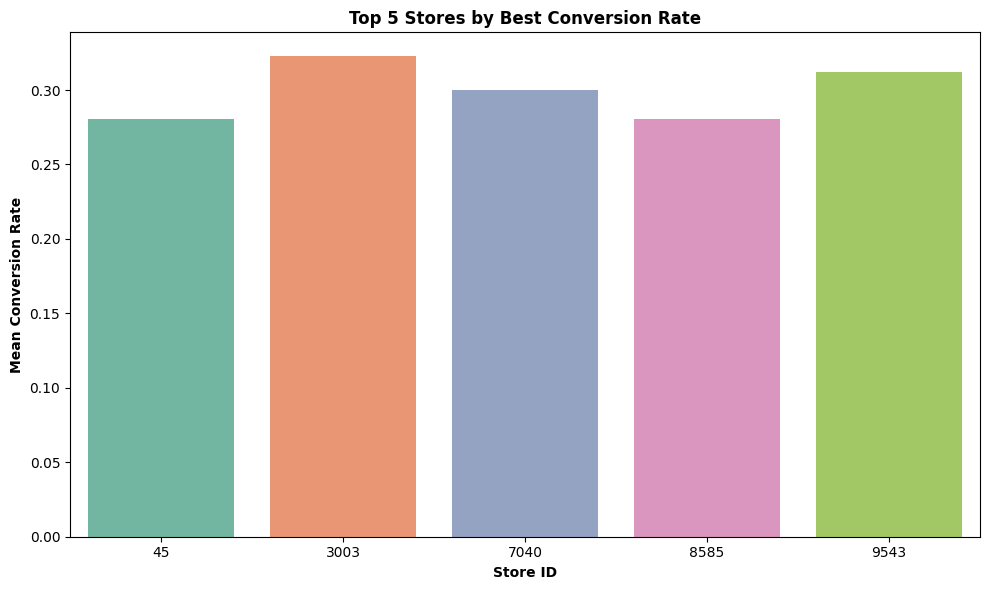

In [38]:
import warnings
warnings.filterwarnings("ignore")
top_5_stores = df.groupby("store_id")["conversion_rate"].mean().reset_index()
top_5_stores = top_5_stores.sort_values(by="conversion_rate", ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='store_id', y='conversion_rate', data=top_5_stores, palette='Set2')
plt.xlabel('Store ID', fontweight='bold')
plt.ylabel('Mean Conversion Rate', fontweight='bold')
plt.title('Top 5 Stores by Best Conversion Rate', fontweight='bold')
plt.tight_layout()
plt.show()



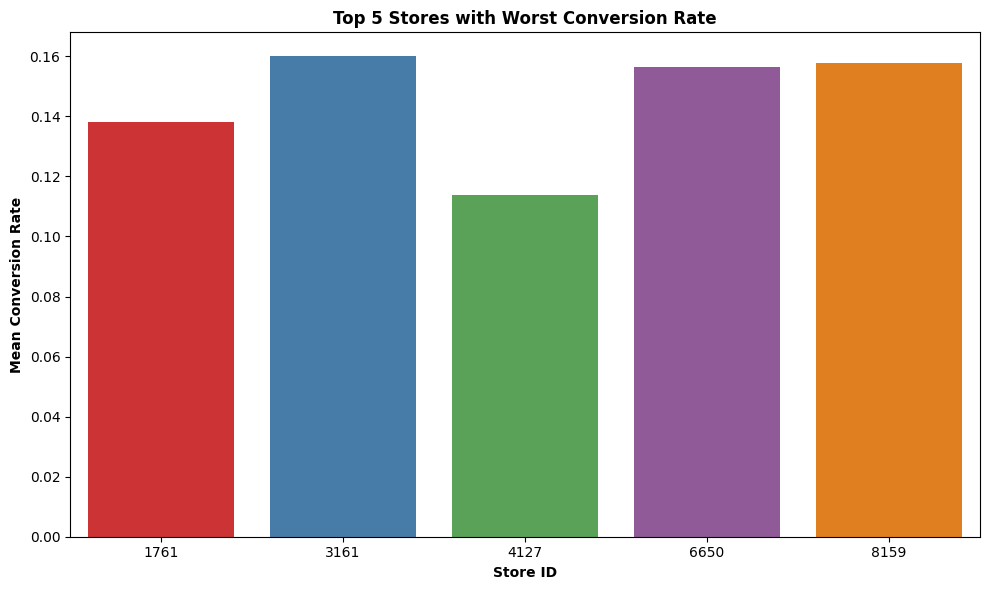

In [39]:
low_5_stores = df.groupby("store_id")["conversion_rate"].mean().reset_index()
low_5_stores = low_5_stores.sort_values(by="conversion_rate", ascending=True).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='store_id', y='conversion_rate', data=low_5_stores, palette='Set1')
plt.xlabel('Store ID', fontweight='bold')
plt.ylabel('Mean Conversion Rate', fontweight='bold')
plt.title('Top 5 Stores with Worst Conversion Rate', fontweight='bold')
plt.tight_layout()
plt.show()

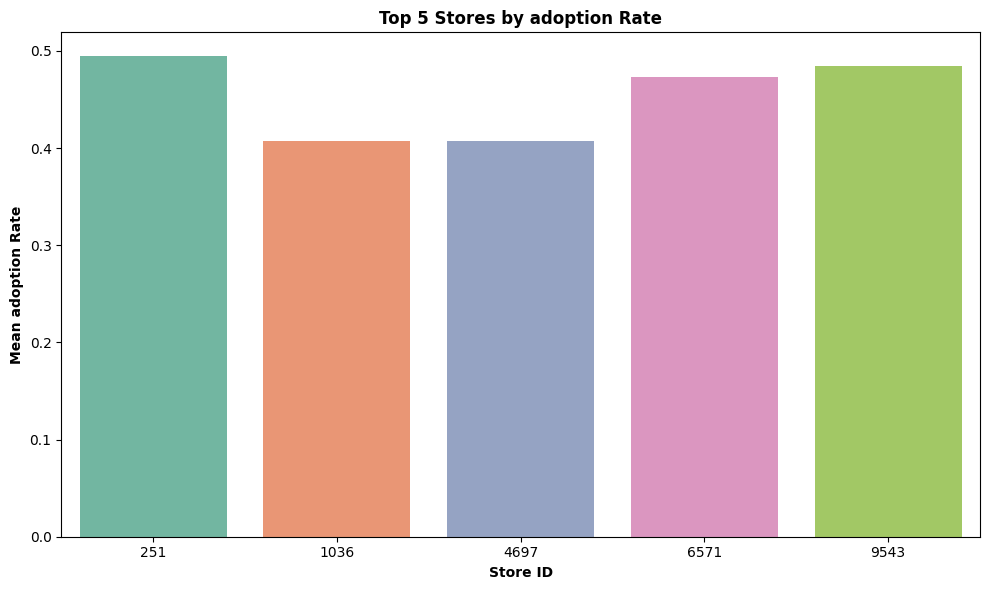

In [40]:
top_5_stores = df.groupby("store_id")["adoption"].mean().reset_index()
top_5_stores = top_5_stores.sort_values(by="adoption", ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='store_id', y='adoption', data=top_5_stores, palette='Set2')
plt.xlabel('Store ID', fontweight='bold')
plt.ylabel('Mean adoption Rate', fontweight='bold')
plt.title('Top 5 Stores by adoption Rate', fontweight='bold')
plt.tight_layout()
plt.show()

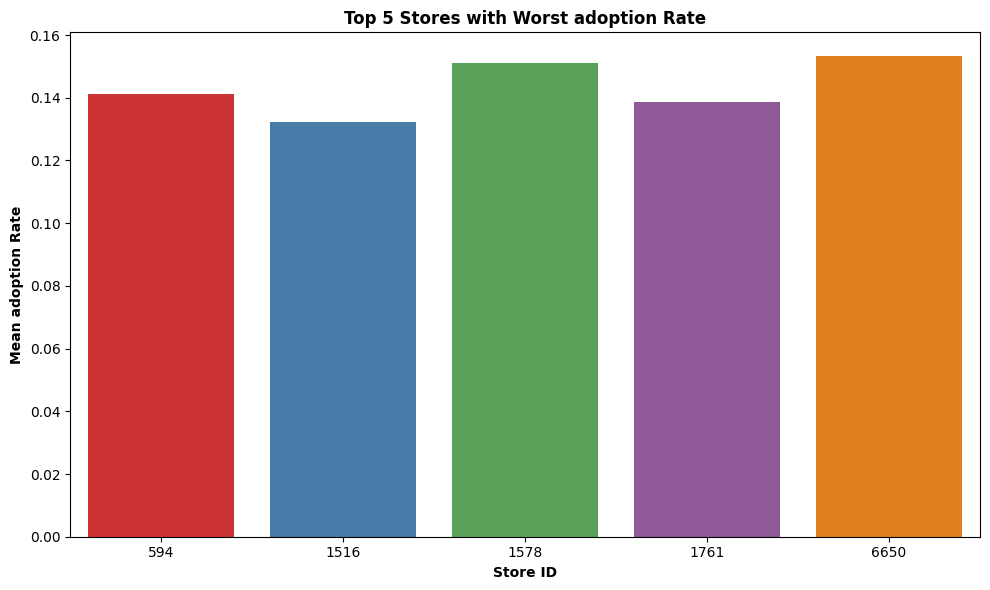

In [41]:
low_5_stores = df.groupby("store_id")["adoption"].mean().reset_index()
low_5_stores = low_5_stores.sort_values(by="adoption", ascending=True).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='store_id', y='adoption', data=low_5_stores, palette='Set1')
plt.xlabel('Store ID', fontweight='bold')
plt.ylabel('Mean adoption Rate', fontweight='bold')
plt.title('Top 5 Stores with Worst adoption Rate', fontweight='bold')
plt.tight_layout()
plt.show()

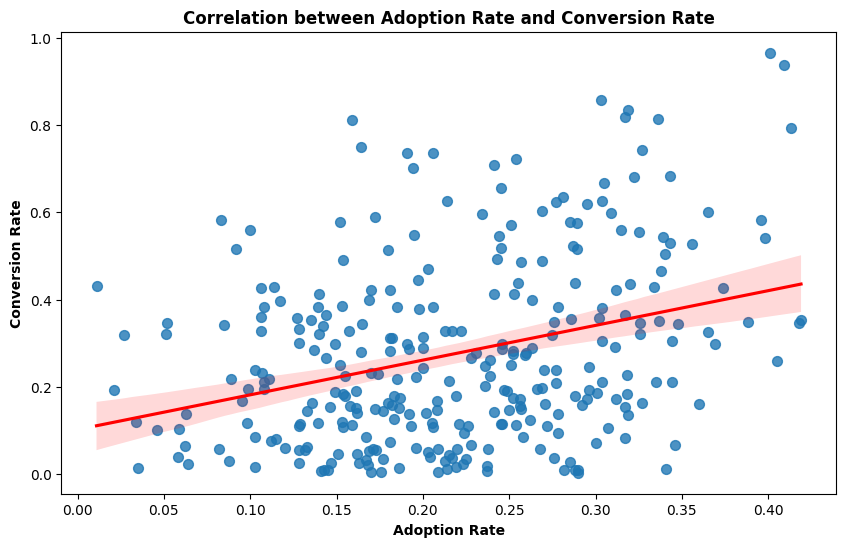

In [42]:
# Plotting the correlation
plt.figure(figsize=(10, 6))
sns.regplot(x='conversion_rate', y='adoption', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.xlabel('Adoption Rate', fontweight='bold')
plt.ylabel('Conversion Rate', fontweight='bold')
plt.title('Correlation between Adoption Rate and Conversion Rate', fontweight='bold')
plt.show()


In [43]:
from sklearn.linear_model import LinearRegression

X = df[['conversion_rate']]
y = df['adoption']
model = LinearRegression()
model.fit(X, y)
r_squared = model.score(X, y)
print(f'R^2: {r_squared}')
intercept = model.intercept_
coef = model.coef_[0]
print(f'The ecuation of the line is y = {intercept:.2f} + {coef:.2f}x')

R^2: 0.1050239379314909
The ecuation of the line is y = 0.10 + 0.80x


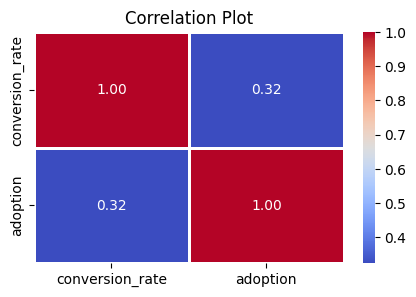

In [44]:
numerical_cols = ['conversion_rate', 'adoption']
correlation_matrix = df[numerical_cols].corr()
correlation_matrix
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Plot')
plt.show()